In [ ]:
'''
Light GBM : (Light Gradient Boosting Machine)
    - In 2017 Microsft Introduced First version of LightGBM
    - LightGBM is unique in that it can construct trees using Gradient-Based One-Sided Sampling(GOSS),
    - The Main Difference between XGB and LightGBM is way of growin trees.
    - XGBoost applies level-wise tree growth where LightGBM applies leaf-wise tree growth
        - Level wise: trees grows in Horizontal
        - Leaf-wise : Trees grows in vertical
        
    
    - XG Boost expands the 1st level of trees. and then expands the 2nd level when 1st level was expanded. on the other hand
      Light GBM does't wait to finish the 1st level to expand child nodes in the 2nd and 3rd level,it goes maximum depth
      vertically.

In [ ]:
'''
Light GBM
    - This framework reduces the cost of calculating the gain for each split compare to XGBoost
    - It reduces memory usage by replacing the continuous values with discrete bins.
    - It reduces communication costs for parallel learning.
    - LightGBM uses histogram-based algorithms which results in faster training efficiency.

In [ ]:
'''
When to use XGBoost and Light GBM
    - Building machine learning model where you do not have have GPU and Strong CPU power. we might use LightGBM in the 
      early stages of project Light GBM is 10 times faster (Only on CPU) than the XGBoost 
    - Installing and Running LightGBM on GPU is Problematics, The default installation package does not support GPU.
    - XG Boost faster than LightGBM on GPU

In [7]:
import warnings
warnings.filterwarnings('ignore')

### Comparing LightGBM and XG Boost

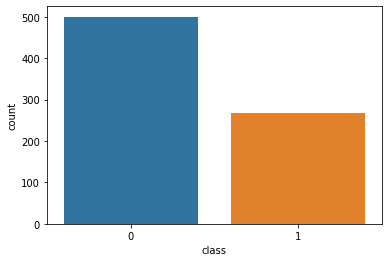

In [3]:
# Importing the basic libraries
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import gc
  
gc.enable()
  
# Importing LGBM and XGBOOST
import lightgbm as lgb
import xgboost as xgb
  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv("pima-indians-diabetes.csv",names= names)

array = data.values
X = array[:,0:8]
Y = array[:,8]

# Checking for missing values across the 562 features of the dataset
data.isna().sum()*100/len(data)
  
# Checking for Target Distribution
sns.countplot(data['class'])
plt.show()

# Saving the target variable(dependent variable) to target 
# variable and dropping it from the original "data" dataframe
target=data['class']
data.drop(columns={'class'},inplace=True)

In [4]:
# Splitting the Dataset into Training and Testing Dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.15,random_state=100)

# Starting to track the Time
start = time.time()   
#xg=xgb.XGBClassifier(max_depth=7,learning_rate=0.05,silent=1,eta=1,objective='multi:softprob',num_round=50,num_classes=2) 

# fit model no training data
xg = xgb.XGBClassifier(max_depth=7,learning_rate=0.05,silent=1,eta=1,num_round=50,num_classes=2)

# Fitting the Model
xg.fit(X_train,y_train) 
  
# Stopping the tracking of time  
stop = time.time()    
exec_time_xgb=stop-start
  
# Measuring the time taken for the model to build 
exec_time_xgb              
  
# Predicting the Output Class
ypred_xgb=xg.predict(X_test) 
ypred_xgb
  
  
# Getting the Accuracy Score for the XGBOOST Model
from sklearn.metrics import accuracy_score
accuracy_xgb = accuracy_score(y_test,ypred_xgb)
  
# Setting the Parameters and Training data for LightGBM Model
data_train = lgb.Dataset(X_train,label = y_train)
params= {}
  
# Usually set between 0 to 1.
params['learning_rate']=0.5 
  
# GradientBoostingDecisionTree
params['boosting_type']='gbdt' 
  
# Multi-class since the target class has 6 classes.
params['objective']='multiclass' 
  
# Metric for multi-class
params['metric']='multi_logloss' 
params['max_depth']=7
params['num_class']=7 
  
# This value is not inclusive of the end value.
# Hence we have 6 classes the value is set to 7.
  
# Training the LightGBM Model
num_round =50
start = time.time()
lgbm = lgb.train(params,data_train,num_round)
stop = time.time()
  
#Execution time of the LightGBM Model
exec_time_lgbm = stop-start
exec_time_lgbm
  
# Predicting the output on the Test Dataset 
ypred_lgbm = lgbm.predict(X_test)
ypred_lgbm
y_pred_lgbm_class = [np.argmax(line) for line in ypred_lgbm]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 652, number of used features: 8
[LightGBM] [Info] Start training from score -0.427955
[LightGBM] [Info] Start training from score -1.055095
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [5]:

# Accuracy Score for the LightGBM Model
from sklearn.metrics import accuracy_score
accuracy_lgbm=accuracy_score(y_test,y_pred_lgbm_class)
  
# Comparing the Accuracy and Execution Time for both the Algorithms
comparison = {'Accuracy:':(accuracy_lgbm,accuracy_xgb),\
              'Execution Time(in seconds):':(exec_time_lgbm,exec_time_xgb)}

LGBM_XGB = pd.DataFrame(comparison)
LGBM_XGB .index = ['LightGBM','XGBoost']
LGBM_XGB
  
# On comparison we notice that LightGBM is 
# faster and gives better accuracy.
comp_ratio=(203.594708/29.443264)
comp_ratio
print("LightGBM is "+" "+str(np.ceil(comp_ratio))+" "+ str("times")+" "+"faster than XGBOOST Algorithm")

LightGBM is  7.0 times faster than XGBOOST Algorithm
